# Mircrograd from scratch
 - These notebooks/docs are created when going through the lessons of zero to hero taught by andrej karpathy

In [ ]:
import math
import numpy as np
import matplotlib.pyplot as plt
from rich import print
from rich import pretty

In [ ]:
pretty.install()

## Single Variable: `x`

Create a function

In [ ]:
def f(x): return 3*x**2 - 4*x + 5

In [ ]:
f(3.0)

20.0

In [ ]:
xs = np.arange(-5, 5, 0.25)
xs

array([-5.  , -4.75, -4.5 , -4.25, -4.  , -3.75, -3.5 , -3.25, -3.  ,
       -2.75, -2.5 , -2.25, -2.  , -1.75, -1.5 , -1.25, -1.  , -0.75,
       -0.5 , -0.25,  0.  ,  0.25,  0.5 ,  0.75,  1.  ,  1.25,  1.5 ,
        1.75,  2.  ,  2.25,  2.5 ,  2.75,  3.  ,  3.25,  3.5 ,  3.75,
        4.  ,  4.25,  4.5 ,  4.75])

In [ ]:
ys = f(xs)
ys

array([100.    ,  91.6875,  83.75  ,  76.1875,  69.    ,  62.1875,
        55.75  ,  49.6875,  44.    ,  38.6875,  33.75  ,  29.1875,
        25.    ,  21.1875,  17.75  ,  14.6875,  12.    ,   9.6875,
         7.75  ,   6.1875,   5.    ,   4.1875,   3.75  ,   3.6875,
         4.    ,   4.6875,   5.75  ,   7.1875,   9.    ,  11.1875,
        13.75  ,  16.6875,  20.    ,  23.6875,  27.75  ,  32.1875,
        37.    ,  42.1875,  47.75  ,  53.6875])

Plot the function

[<matplotlib.lines.Line2D object at 0x7fdd814ffbd0>]

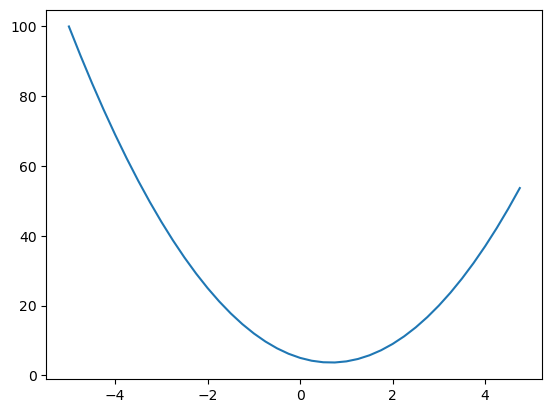

In [ ]:
plt.plot(xs, ys)

### Derivative on increasing side of the curve

In [ ]:
h = 0.0000000001
x = 3.0
(f(x + h) - f(x))/h

14.000001158365194

### Derivative on the decreasing side of the curve

In [ ]:
h = 0.0000000001
x = -3.0
(f(x + h) - f(x))/h

-21.999966293151374

### Derivative on the bottom of the curve

In [ ]:
h = 0.0000000001
x = 2/3
(f(x + h) - f(x))/h

0.0

## Multivariable: `a`, `b`, `c` 

In [ ]:
a = 2.0
b = -3.0
c = 10.0
def d(a, b, c): return a*b + c
print(d(a, b, c))

4.0

### Derivative with respect to `a`

In [ ]:
h = 0.0001

a = 2.0
b = -3.0
c = 10.0

d1 = d(a, b, c)

a += h
d2 = d(a, b, c)


print('d1', d1)
print('d2', d2)
print('slope', (d2 - d1)/h)

d1 4.0

d2 3.999699999999999

slope -3.000000000010772

### Derivative with respect to `b` 

In [ ]:
h = 0.0001

a = 2.0
b = -3.0
c = 10.0

d1 = d(a, b, c)

b += h
d2 = d(a, b, c)


print('d1', d1)
print('d2', d2)
print('slope', (d2 - d1)/h)

d1 4.0

d2 4.0002

slope 2.0000000000042206

### Derivative with respect to `c`

In [ ]:
h = 0.0001

a = 2.0
b = -3.0
c = 10.0

d1 = d(a, b, c)

c += h
d2 = d(a, b, c)


print('d1', d1)
print('d2', d2)
print('slope', (d2 - d1)/h)

d1 4.0

d2 4.0001

slope 0.9999999999976694

## Create Value Object
(mentioned in the README of [micrograd](https://github.com/karpathy/micrograd) )

### Define intial template of Value Class

In [ ]:
class Value:
    def __init__(self, data):
        self.data = data

    def __repr__(self):
        return f"Value(data={self.data})"

In [ ]:
a = Value(2.0)
b = Value(-3.0)
a, b

(Value(data=2.0), Value(data=-3.0))

### Add the `add` function

In [ ]:
class Value:
    def __init__(self, data):
        self.data = data

    def __repr__(self):
        return f"Value(data={self.data})"

    def __add__(self, other): # ⭠ for adding among the value objects
        return Value(self.data + other.data)

In [ ]:
a = Value(2.0)
b = Value(-3.0)
a, b

(Value(data=2.0), Value(data=-3.0))

In [ ]:
a + b # a.__add__(b)

Value(data=-1.0)

### Add the `mul` function

In [ ]:
class Value:
    def __init__(self, data):
        self.data = data

    def __repr__(self):
        return f"Value(data={self.data})"

    def __add__(self, other):
        return Value(self.data + other.data)

    def __mul__(self, other): # ⭠ for multiplying among the value objects
        return Value(self.data * other.data)

In [ ]:
a = Value(2.0)
b = Value(-3.0)
a, b

(Value(data=2.0), Value(data=-3.0))

In [ ]:
a * b # a.__mul__(b)

Value(data=-6.0)

In [ ]:
c = Value(10.0)

In [ ]:
d = a * b + c; d

Value(data=4.0)

### Add the functionality to know what values created a value with `_children`

In [ ]:
class Value:
    def __init__(self, data, _children=()): # ⭠ Add _children
        self.data = data
        self._prev = set(_children) # ⭠ Add _children

    def __repr__(self):
        return f"Value(data ={self.data})"

    def __add__(self, other):
        return Value(self.data + other.data, (self, other))

    def __mul__(self, other):
        return Value(self.data * other.data, (self, other))

In [ ]:
a = Value(2.0)
b = Value(-3.0)
c = Value(10.0)
d = a*b + c
d

Value(data =4.0)

In [ ]:
d._prev # childrens are -6.0 (a *b) and 10.0 (c)

{Value(data =10.0), Value(data =-6.0)}

### Add the functionality to know what operations created a value with `_op`

In [ ]:
class Value:
    def __init__(self, data, _children=(), _op=''): # ⭠ Add _op
        self.data = data
        self._prev = set(_children)
        self._op = _op # ⭠ Add _op

    def __repr__(self):
        return f"Value(data={self.data})"

    def __add__(self, other):
        return Value(self.data + other.data, (self, other), '+')

    def __mul__(self, other):
        return Value(self.data * other.data, (self, other), '*')

In [ ]:
a = Value(2.0)
b = Value(-3.0)
c = Value(10.0)
d = a*b + c
d

Value(data=4.0)

In [ ]:
d._prev

{Value(data=10.0), Value(data=-6.0)}

In [ ]:
d._op

'+'

### Visualize the expression graph with operators and operands

In [ ]:
from graphviz import Digraph

def trace(root):
    # build a set of all nodes and edges in a graph
    nodes, edges = set(), set()
    def build(v):
        if v not in nodes:
            nodes.add(v)
            for child in v._prev:
                edges.add((child, v))
                build(child)
    build(root)
    return nodes, edges

In [ ]:
def draw_dot(root, label):
    dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'}) # LR = left to right

    nodes, edges = trace(root)
    for n in nodes:
        uid = str(id(n))
        # for any value in the graph, create a rectangular ('record') node for it
        dot.node(name = uid, label=label(n), shape='record') # ⭠ label function getting called
        if n._op:
            # if this value is a result of some operation, create an op node for it
            dot.node(name = uid + n._op, label = n._op)
            dot.edge(uid + n._op, uid)
  
    for n1, n2 in edges:
        # connect n1 to the op node of n2
        dot.edge(str(id(n1)), str(id(n2)) + n2._op)
  
    return dot

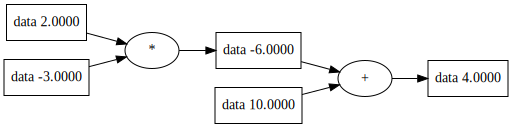

In [ ]:
def label(node): return "{data %.4f}" % (node.data)
draw_dot(d, label)

### Add label to each node
> so that we know what are the corresponding variables for each value

In [ ]:
class Value:
    def __init__(self, data, _children=(), _op='', label=''): # ⭠ Add label
        self.data = data
        self._prev = set(_children)
        self._op = _op
        self.label = label # ⭠ Add label

    def __repr__(self):
        return f"Value(label={self.label} data={self.data})"

    def __add__(self, other):
        return Value(self.data + other.data, (self, other), '+')

    def __mul__(self, other):
        return Value(self.data * other.data, (self, other), '*')

In [ ]:
a = Value(2.0, label = 'a')
b = Value(-3.0, label='b')
c = Value(10, label = 'c')
e = a*b; e.label = 'e'
d = e + c; d.label = 'd'
f = Value(-2.0, label='f')
L = d * f; L.label = 'L'
L

Value(label=L data=-8.0)

Change the `label` function to render the label

In [ ]:
def label(node): return "{%s | {data %.4f}}" % (node.label, node.data)

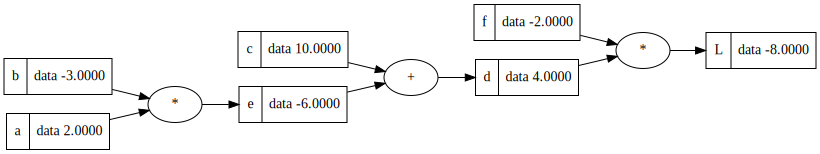

In [ ]:
draw_dot(L, label)

### Add `grad` to `Value` class

In [ ]:
class Value:
    def __init__(self, data, _children=(), _op='', label=''):
        self.data = data
        self.grad = 0.0 # ⭠ Add grad
        self._prev = set(_children)
        self._op = _op
        self.label = label

    def __repr__(self):
        return f"Value(label={self.label} data={self.data})"

    def __add__(self, other):
        return Value(self.data + other.data, (self, other), '+')

    def __mul__(self, other):
        return Value(self.data * other.data, (self, other), '*')

In [ ]:
a = Value(2.0, label = 'a')
b = Value(-3.0, label='b')
c = Value(10, label = 'c')
e = a*b; e.label = 'e'
d = e + c; d.label = 'd'
f = Value(-2.0, label='f')
L = d * f; L.label = 'L'
L.grad

0.0

In [ ]:
def label(node): return "{%s | {data %.4f} | grad %.4f}" % (node.label, node.data, node.grad)

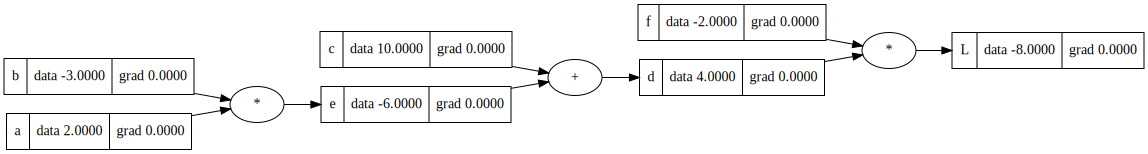

In [ ]:
draw_dot(L, label)

### Create a function `lol` 
#### Derive with respect to `a`

In [ ]:
def lol():
    h = 0.0001

    a = Value(2.0, label = 'a')
    b = Value(-3.0, label='b')
    c = Value(10, label = 'c')
    e = a*b; e.label = 'e'
    d = e + c; d.label = 'd'
    f = Value(-2.0, label='f')
    L = d * f; L.label = 'L'
    L1 = L.data 

    a = Value(2.0 + h, label = 'a')
    b = Value(-3.0, label='b')
    c = Value(10, label = 'c')
    e = a*b; e.label = 'e'
    d = e + c; d.label = 'd'
    f = Value(-2.0, label='f')
    L = d * f; L.label = 'L'
    L2 = L.data

    print((L2 - L1) / h)

lol()

6.000000000021544

#### Derive with respect to `L`

In [ ]:
def lol():
    h = 0.0001

    a = Value(2.0, label = 'a')
    b = Value(-3.0, label='b')
    c = Value(10, label = 'c')
    e = a*b; e.label = 'e'
    d = e + c; d.label = 'd'
    f = Value(-2.0, label='f')
    L = d * f; L.label = 'L'
    L1 = L.data 

    a = Value(2.0, label = 'a')
    b = Value(-3.0, label='b')
    c = Value(10, label = 'c')
    e = a*b; e.label = 'e'
    d = e + c; d.label = 'd'
    f = Value(-2.0, label='f')
    L = d * f; L.label = 'L'
    L2 = L.data + h

    print((L2 - L1) / h)

lol()

0.9999999999976694

In [ ]:
L.grad = 1

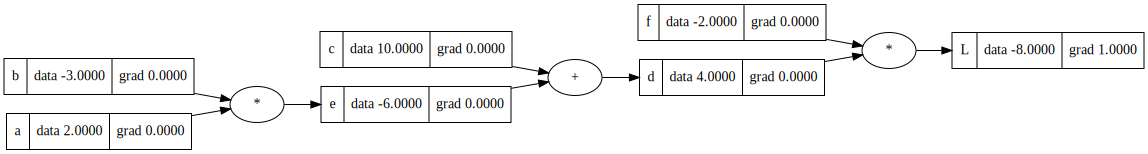

In [ ]:
draw_dot(L, label)


#### Derivative of `L` with respect to `f`

$$ L = f \cdot d $$

$$ \frac{\partial L}{\partial f} = \frac{\partial (f \cdot d)}{\partial f} = d = 4.0 $$



In [ ]:
def lol():
    h = 0.001

    a = Value(2.0, label = 'a')
    b = Value(-3.0, label='b')
    c = Value(10, label = 'c')
    e = a*b; e.label = 'e'
    d = e + c; d.label = 'd'
    f = Value(-2.0, label='f')
    L = d * f; L.label = 'L'
    L1 = L.data 

    a = Value(2.0, label = 'a')
    b = Value(-3.0, label='b')
    c = Value(10, label = 'c')
    e = a*b; e.label = 'e'
    d = e + c; d.label = 'd'
    f = Value(-2.0 + h, label='f')
    L = d * f; L.label = 'L'
    L2 = L.data

    print((L2 - L1) / h)

lol()

3.9999999999995595

In [ ]:
f.grad = 4

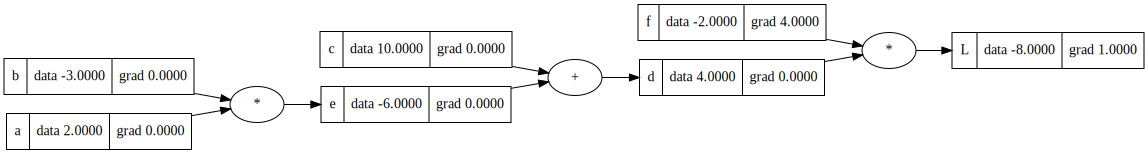

In [ ]:
draw_dot(L, label)

#### Derivative of `L` with respect to `d`


$$ \frac{\partial L}{\partial d} = \frac{\partial (f \cdot d)}{\partial d} = f = -2.0 $$


In [ ]:
def lol():
    h = 0.001

    a = Value(2.0, label = 'a')
    b = Value(-3.0, label='b')
    c = Value(10, label = 'c')
    e = a*b; e.label = 'e'
    d = e + c; d.label = 'd'
    f = Value(-2.0, label='f')
    L = d * f; L.label = 'L'
    L1 = L.data 

    a = Value(2.0, label = 'a')
    b = Value(-3.0, label='b')
    c = Value(10, label = 'c')
    e = a*b; e.label = 'e'
    d = e + c; d.label = 'd'
    d.data += h
    f = Value(-2.0, label='f')
    L = d * f; L.label = 'L'
    L2 = L.data

    print((L2 - L1) / h)

lol()

-2.000000000000668

In [ ]:
d.grad = -2

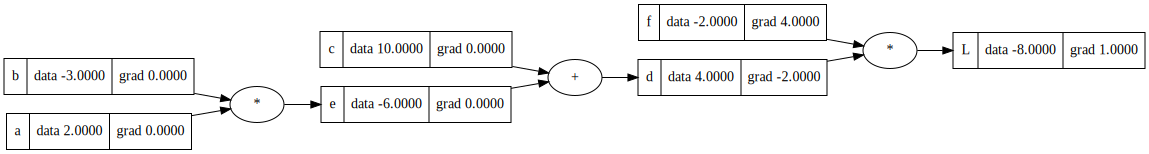

In [ ]:
draw_dot(L, label)

#### Derivative of `L` with respect to `c`

$$ \frac{\partial d}{\partial c} = \frac{\partial (c + e)}{\partial c} = 1.0 $$

$$ \frac{\partial L}{\partial c} = \frac{\partial L}{\partial d}\cdot\frac{\partial d}{\partial c} = f = -2.0 $$

In [ ]:
def lol():
    h = 0.001

    a = Value(2.0, label = 'a')
    b = Value(-3.0, label='b')
    c = Value(10, label = 'c')
    e = a*b; e.label = 'e'
    d = e + c; d.label = 'd'
    f = Value(-2.0, label='f')
    L = d * f; L.label = 'L'
    L1 = L.data 

    a = Value(2.0, label = 'a')
    b = Value(-3.0, label='b')
    c = Value(10 + h, label = 'c')
    e = a*b; e.label = 'e'
    d = e + c; d.label = 'd'
    f = Value(-2.0, label='f')
    L = d * f; L.label = 'L'
    L2 = L.data

    print((L2 - L1) / h)

lol()

-1.9999999999988916

In [ ]:
c.grad = -2

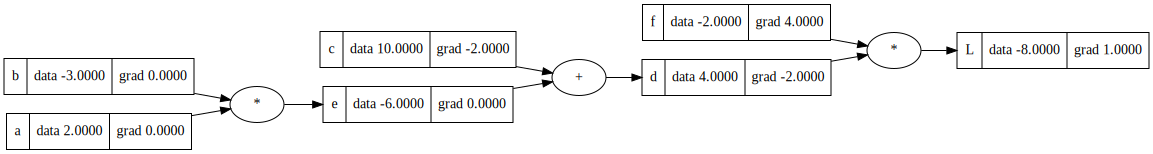

In [ ]:
draw_dot(L, label)

#### Derivative of `L` with respect to `e`

$$ \frac{\partial d}{\partial e} = \frac{\partial (c + e)}{\partial e} = 1.0 $$

$$ \frac{\partial L}{\partial e} = \frac{\partial L}{\partial d} \cdot \frac{\partial d}{\partial e} = f = -2.0 $$

In [ ]:
def lol():
    h = 0.001

    a = Value(2.0, label = 'a')
    b = Value(-3.0, label='b')
    c = Value(10, label = 'c')
    e = a*b; e.label = 'e'
    d = e + c; d.label = 'd'
    f = Value(-2.0, label='f')
    L = d * f; L.label = 'L'
    L1 = L.data 

    a = Value(2.0, label = 'a')
    b = Value(-3.0, label='b')
    c = Value(10, label = 'c')
    e = a*b; e.label = 'e'
    e.data += h
    
    d = e + c; d.label = 'd'
    f = Value(-2.0, label='f')
    L = d * f; L.label = 'L'
    L2 = L.data

    print((L2 - L1) / h)

lol()

-2.000000000000668

In [ ]:
e.grad = -2

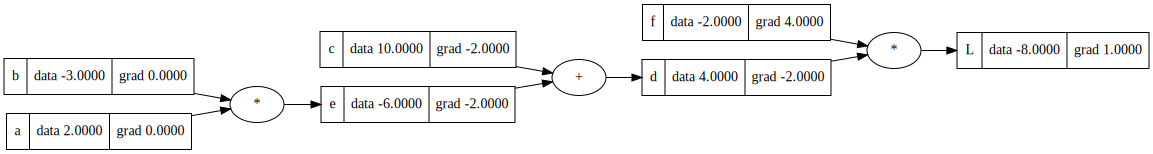

In [ ]:
draw_dot(L, label)

#### Derivative of `L` with respect to `a`

$$ \frac{\partial e}{\partial a} = \frac{\partial ({a}\cdot{b})}{\partial a} = b $$

$$ \frac{\partial L}{\partial a} = \frac{\partial L}{\partial e} \cdot \frac{\partial e}{\partial a} = -2b = 6 $$

In [ ]:
def lol():
    h = 0.001

    a = Value(2.0, label = 'a')
    b = Value(-3.0, label='b')
    c = Value(10, label = 'c')
    e = a*b; e.label = 'e'
    d = e + c; d.label = 'd'
    f = Value(-2.0, label='f')
    L = d * f; L.label = 'L'
    L1 = L.data 

    a = Value(2.0 + h, label = 'a')
    b = Value(-3.0, label='b')
    c = Value(10, label = 'c')
    e = a*b; e.label = 'e'
    
    d = e + c; d.label = 'd'
    f = Value(-2.0, label='f')
    L = d * f; L.label = 'L'
    L2 = L.data

    print((L2 - L1) / h)

lol()

6.000000000000227

In [ ]:
a.grad = 6

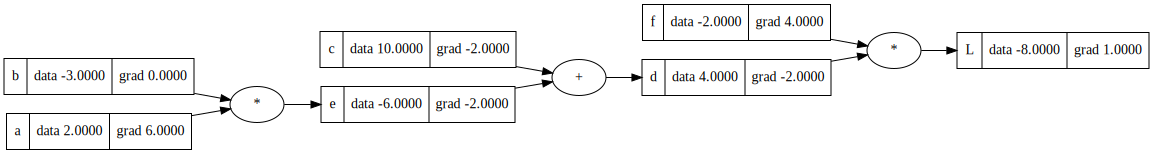

In [ ]:
draw_dot(L, label)

#### Derivative of `L` with respect to `b`

$$ \frac{\partial e}{\partial b} = \frac{\partial ({a}\cdot{b})}{\partial b} = a $$

$$ \frac{\partial L}{\partial b} = \frac{\partial L}{\partial e} \cdot \frac{\partial e}{\partial b}= -2a = -4 $$

In [ ]:
def lol():
    h = 0.001

    a = Value(2.0, label = 'a')
    b = Value(-3.0, label='b')
    c = Value(10, label = 'c')
    e = a*b; e.label = 'e'
    d = e + c; d.label = 'd'
    f = Value(-2.0, label='f')
    L = d * f; L.label = 'L'
    L1 = L.data 

    a = Value(2.0, label = 'a')
    b = Value(-3.0 + h, label='b')
    c = Value(10, label = 'c')
    e = a*b; e.label = 'e'
    
    d = e + c; d.label = 'd'
    f = Value(-2.0, label='f')
    L = d * f; L.label = 'L'
    L2 = L.data

    print((L2 - L1) / h)

lol()

-3.9999999999995595

In [ ]:
b.grad = -4

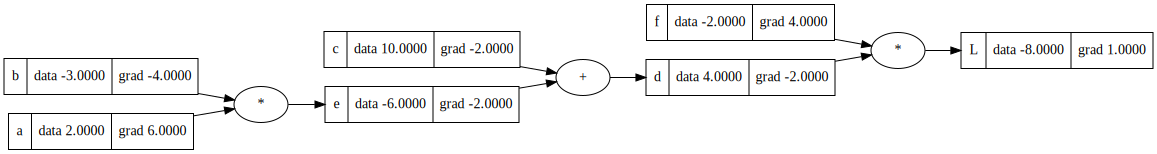

In [ ]:
draw_dot(L, label)

In [ ]:
a.data += 0.01 * a.grad
b.data += 0.01 * b.grad
c.data += 0.01 * c.grad
f.data += 0.01 * f.grad

In [ ]:
e = a * b
d = e + c
L = d * f
print(L.data)

-7.286496

## Neural Network

### Tanh

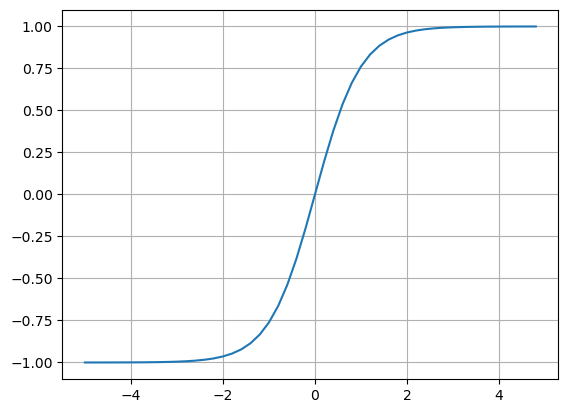

In [ ]:
plt.plot(np.arange(-5, 5, 0.2), np.tanh(np.arange(-5, 5, 0.2))); plt.grid();

### Add `tanh`

In [ ]:
class Value:
    def __init__(self, data, _children=(), _op='', label=''):
        self.data = data
        self.grad = 0.0 # ⭠ Add grad
        self._prev = set(_children)
        self._op = _op
        self.label = label

    def __repr__(self):
        return f"Value(label={self.label} data={self.data})"

    def __add__(self, other):
        return Value(self.data + other.data, (self, other), '+')

    def __mul__(self, other):
        return Value(self.data * other.data, (self, other), '*')
    
    def tanh(self):
        x = self.data
        t = (math.exp(2*x) - 1)/(math.exp(2*x) + 1)
        out = Value(t, (self,), 'tanh')
        return out

### Inputs: x1, x2

In [ ]:
x1 = Value(2.0, label='x1')
x2 = Value(0.0, label='x2')

### Weights: w1, w2

In [ ]:
w1 = Value(-3.0, label='w1')
w2 = Value(1.0, label='w2')

### Bias

In [ ]:
b = Value(6.8813735870195432, label='b')

### x1w1 + x2w2 + b

In [ ]:
x1w1 = x1*w1; x1w1.label='x1*w1'
x2w2 = x2*w2; x2w2.label='x2*w2'
x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label='x1*w1 + x2*w2'
n = x1w1x2w2 + b; n.label='n'

In [ ]:
o = n.tanh(); o.label = 'o'

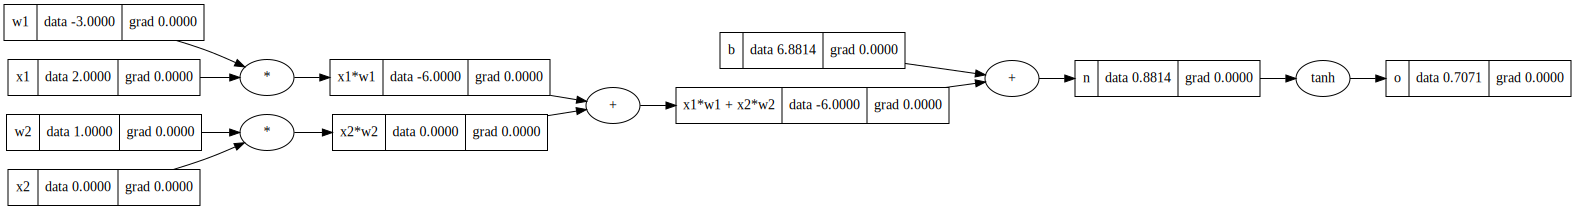

In [ ]:
draw_dot(o, label)

### Computing gradient of each node manually

$$ \frac{\partial o}{\partial o} = 1 $$

In [ ]:
o.grad = 1.0

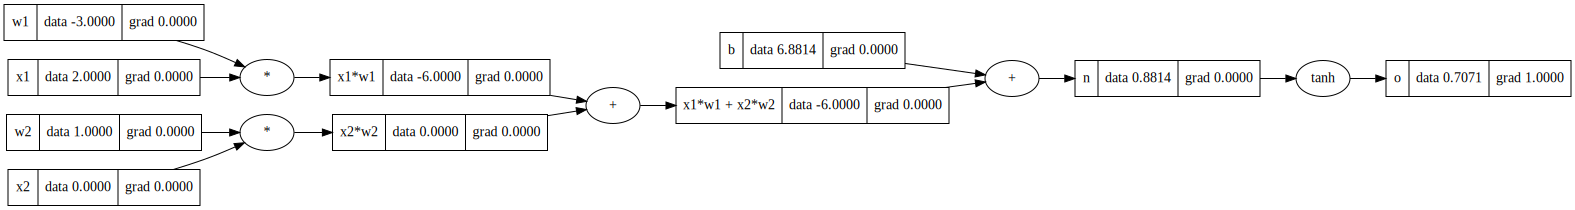

In [ ]:
draw_dot(o, label)

$$ o = \tanh(n) $$
$$ \frac{\partial o}{\partial n} = \frac{\partial{\tanh(n)}}{\partial n} = 1 - \tanh(n)^2 = 1 - o^2 $$

In [ ]:
1 - (o.data ** 2)

0.4999999999999999

In [ ]:
n.grad = 0.5

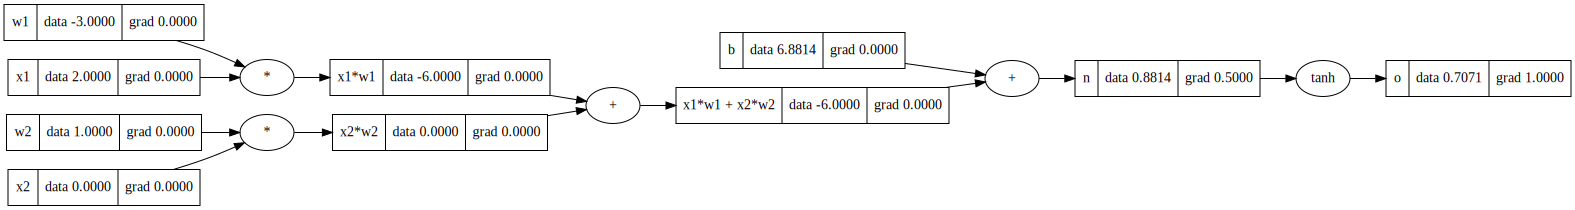

In [ ]:
draw_dot(o, label)

> With pluses as we saw the gradient will be same as previous gradient

In [ ]:
x1w1x2w2.grad = 0.5
b.grad = 0.5

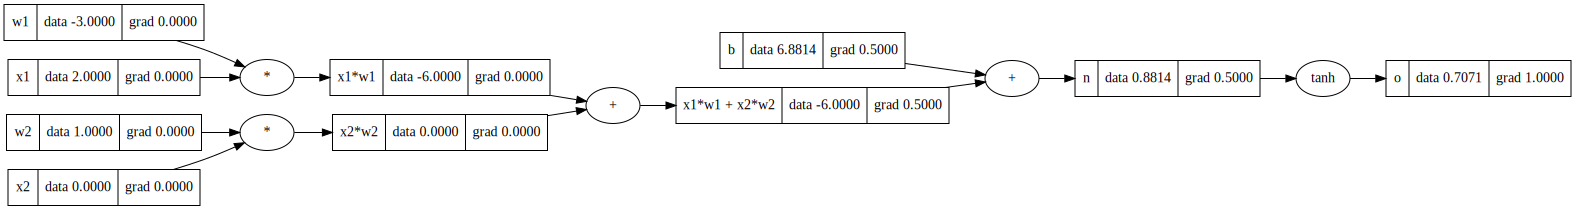

In [ ]:
draw_dot(o, label)

In [ ]:
x1w1.grad = 0.5
x2w2.grad = 0.5

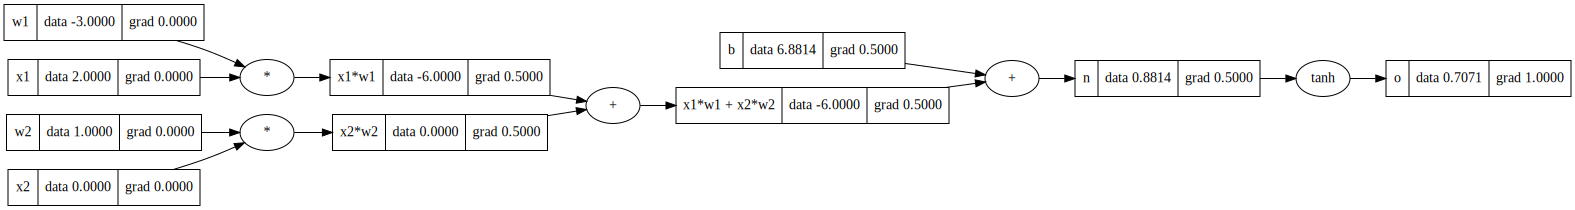

In [ ]:
draw_dot(o, label)

In [ ]:
x2.grad = w2.data * x2w2.grad
w2.grad = x2.data * x2w2.grad

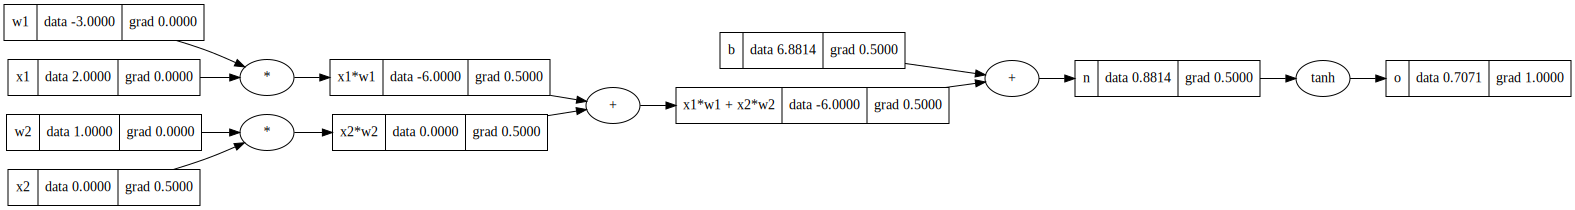

In [ ]:
draw_dot(o, label)

In [ ]:
x1.grad = w1.data * x1w1.grad
w1.grad = x1.data * x1w1.grad

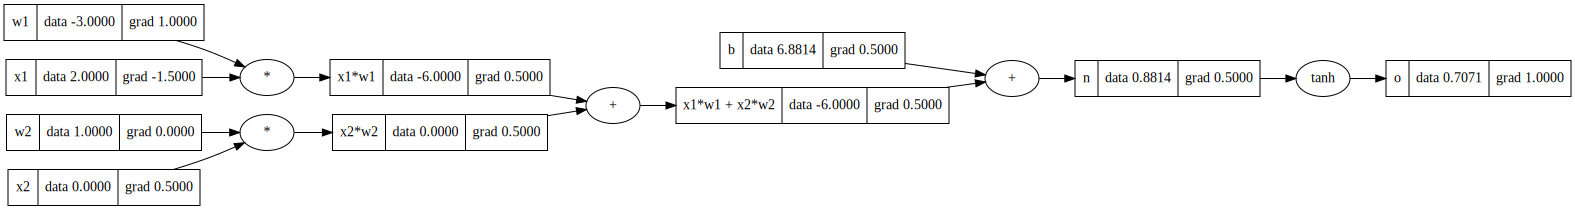

In [ ]:
draw_dot(o, label)

### Computing gradient of each node with `_backward()`

In [ ]:
class Value:
    def __init__(self, data, _children=(), _op='', label=''):
        self.data = data
        self.grad = 0.0 # ⭠ Add grad
        self._backward = lambda : None
        self._prev = set(_children)
        self._op = _op
        self.label = label

    def __repr__(self):
        return f"Value(label={self.label} data={self.data})"

    def __add__(self, other):
        out = Value(self.data + other.data, (self, other), '+')
        def _backward():
            self.grad = 1.0 * out.grad
            other.grad = 1.0 * out.grad
        out._backward = _backward
        return out
        
    def __mul__(self, other):
        out = Value(self.data * other.data, (self, other), '*')
        def _backward():
            self.grad = other.data * out.grad
            other.grad = self.data * out.grad
        out._backward = _backward
        return out
    
    def tanh(self):
        x = self.data
        t = (math.exp(2*x) - 1)/(math.exp(2*x) + 1)
        out = Value(t, (self,), 'tanh')
        
        def _backward():
            self.grad = (1 - t**2) * out.grad
        out._backward = _backward
        return out

> Lets take the NN code from the above

In [ ]:
x1 = Value(2.0, label='x1')
x2 = Value(0.0, label='x2')

w1 = Value(-3.0, label='w1')
w2 = Value(1.0, label='w2')

b = Value(6.8813735870195432, label='b')

x1w1 = x1*w1; x1w1.label='x1*w1'
x2w2 = x2*w2; x2w2.label='x2*w2'
x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label='x1*w1 + x2*w2'
n = x1w1x2w2 + b; n.label='n'
o = n.tanh(); o.label = 'o'

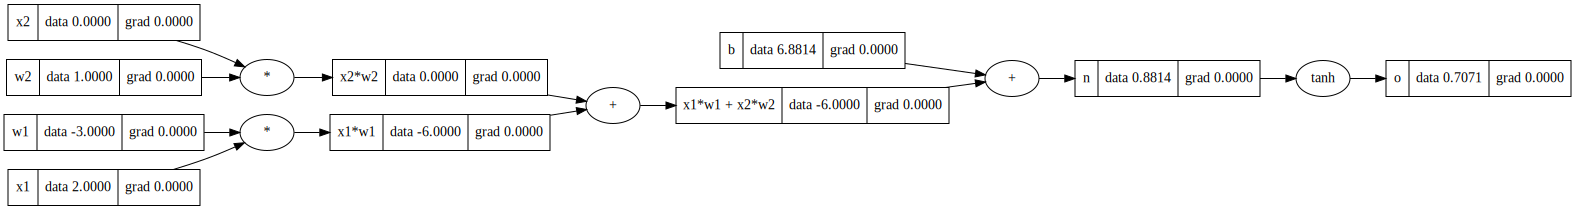

In [ ]:
draw_dot(o, label)

#### Backward on `o`

In [ ]:
o.grad = 1.0 # setting this to 1 because Value's grad variable is 0
o._backward();  n.grad

0.4999999999999999

#### Backward on `n`

In [ ]:
n._backward(); 
b.grad, x1w1x2w2.grad

(0.4999999999999999, 0.4999999999999999)

#### Backward on `b`

In [ ]:
b._backward();

#### Backward on `x1w1x2w2`

In [ ]:
x1w1x2w2._backward(); 
x1w1.grad, x2w2.grad

(0.4999999999999999, 0.4999999999999999)

#### Backward on `x2w2`

In [ ]:
x2w2._backward()
x2.grad, w2.grad

(0.4999999999999999, 0.0)

#### Backward on `x1w1`

In [ ]:
x1w1._backward()
x1.grad, w1.grad

(-1.4999999999999996, 0.9999999999999998)

> Draw the computation graph

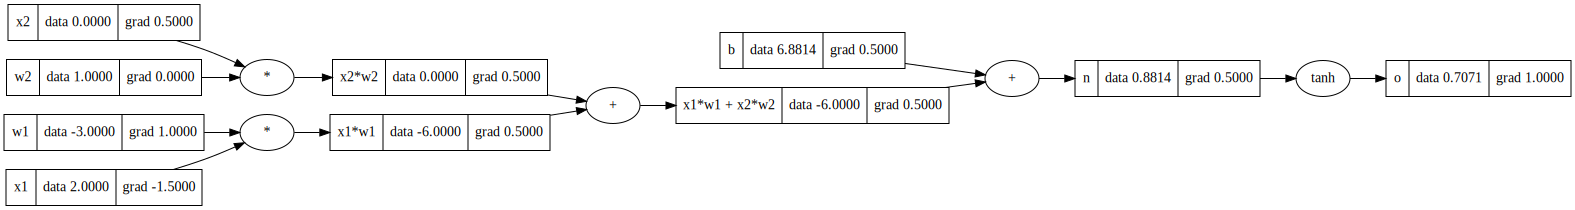

In [ ]:
draw_dot(o, label)

### Backward propogation with one call

In [ ]:
x1 = Value(2.0, label='x1')
x2 = Value(0.0, label='x2')

w1 = Value(-3.0, label='w1')
w2 = Value(1.0, label='w2')

b = Value(6.8813735870195432, label='b')

x1w1 = x1*w1; x1w1.label='x1*w1'
x2w2 = x2*w2; x2w2.label='x2*w2'
x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label='x1*w1 + x2*w2'
n = x1w1x2w2 + b; n.label='n'
o = n.tanh(); o.label = 'o'

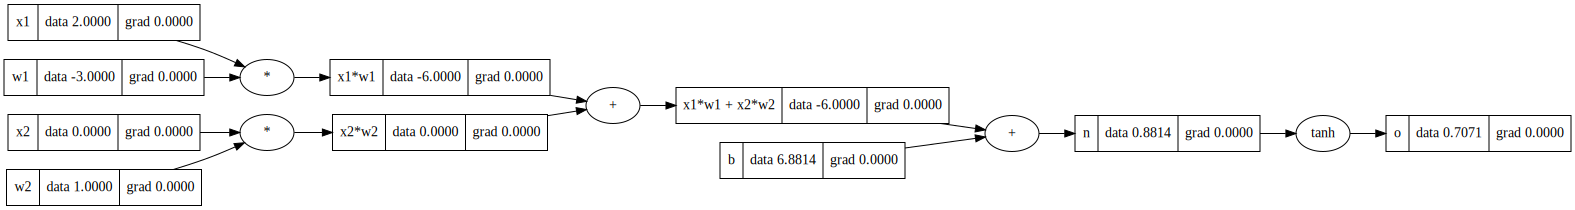

In [ ]:
draw_dot(o, label)

#### Topological sort

In [ ]:
topo = []
visited = set()
def build_topo(v):
    if v not in visited:
        visited.add(v)
        for child in v._prev:
            build_topo(child)
        topo.append(v)
build_topo(o)
topo

[
    Value(label=b data=6.881373587019543),
    Value(label=w2 data=1.0),
    Value(label=x2 data=0.0),
    Value(label=x2*w2 data=0.0),
    Value(label=x1 data=2.0),
    Value(label=w1 data=-3.0),
    Value(label=x1*w1 data=-6.0),
    Value(label=x1*w1 + x2*w2 data=-6.0),
    Value(label=n data=0.8813735870195432),
    Value(label=o data=0.7071067811865476)
]

#### Apply `backward` in reverse order of topological order of the computation graph

In [ ]:
for node in reversed(topo):
    node._backward()

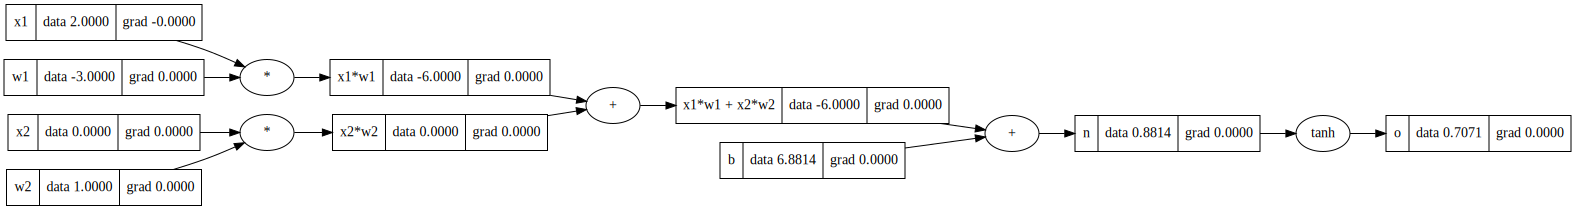

In [ ]:
draw_dot(o, label)

#### Add `backward` to `Value`

In [ ]:
class Value:
    def __init__(self, data, _children=(), _op='', label=''):
        self.data = data
        self.grad = 0.0 # ⭠ Add grad
        self._backward = lambda : None
        self._prev = set(_children)
        self._op = _op
        self.label = label

    def __repr__(self):
        return f"Value(label={self.label} data={self.data})"

    def __add__(self, other):
        out = Value(self.data + other.data, (self, other), '+')
        def _backward():
            self.grad = 1.0 * out.grad
            other.grad = 1.0 * out.grad
        out._backward = _backward
        return out
        
    def __mul__(self, other):
        out = Value(self.data * other.data, (self, other), '*')
        def _backward():
            self.grad = other.data * out.grad
            other.grad = self.data * out.grad
        out._backward = _backward
        return out
    
    def tanh(self):
        x = self.data
        t = (math.exp(2*x) - 1)/(math.exp(2*x) + 1)
        out = Value(t, (self,), 'tanh')
        
        def _backward():
            self.grad = (1 - t**2) * out.grad
        out._backward = _backward
        return out

    def backward(self):
        topo = []
        visited = set()
        def build_topo(v):
            if v not in visited:
                visited.add(v)
                for child in v._prev:
                    build_topo(child)
                topo.append(v)
        build_topo(self)
        
        self.grad = 1.0
        for node in reversed(topo):
            node._backward() 

In [ ]:
x1 = Value(2.0, label='x1')
x2 = Value(0.0, label='x2')

w1 = Value(-3.0, label='w1')
w2 = Value(1.0, label='w2')

b = Value(6.8813735870195432, label='b')

x1w1 = x1*w1; x1w1.label='x1*w1'
x2w2 = x2*w2; x2w2.label='x2*w2'
x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label='x1*w1 + x2*w2'
n = x1w1x2w2 + b; n.label='n'
o = n.tanh(); o.label = 'o'

In [ ]:
o.backward()

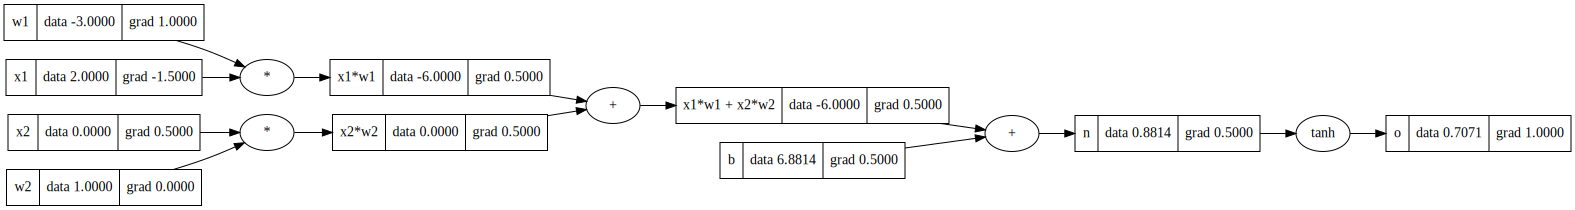

In [ ]:
draw_dot(o, label)

### Fixing a backprop bug

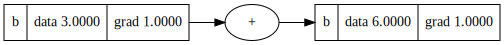

In [ ]:
a = Value(3.0, label='b')
b = a + a; b.label = 'b'
b.backward()
draw_dot(b, label)

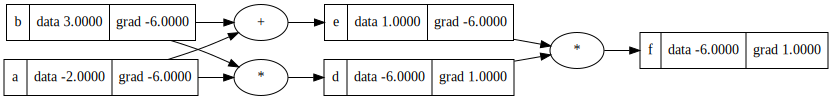

In [ ]:
a = Value(-2.0, label='a')
b = Value(3.0, label='b')
d = a*b; d.label = 'd'
e = a+b; e.label = 'e'
f = d*e; f.label = 'f'
f.backward()
draw_dot(f, label)

#### Accumulate the gradient

In [ ]:
class Value:
    def __init__(self, data, _children=(), _op='', label=''):
        self.data = data
        self.grad = 0.0 # ⭠ Add grad
        self._backward = lambda : None
        self._prev = set(_children)
        self._op = _op
        self.label = label

    def __repr__(self):
        return f"Value(label={self.label} data={self.data})"

    def __add__(self, other):
        out = Value(self.data + other.data, (self, other), '+')
        def _backward():
            self.grad += 1.0 * out.grad # <- Accumulate the gradient
            other.grad += 1.0 * out.grad # <- Accumulate the gradient
        out._backward = _backward
        return out
        
    def __mul__(self, other):
        out = Value(self.data * other.data, (self, other), '*')
        def _backward():
            self.grad += other.data * out.grad # <- Accumulate the gradient
            other.grad += self.data * out.grad # <- Accumulate the gradient
        out._backward = _backward
        return out
    
    def tanh(self):
        x = self.data
        t = (math.exp(2*x) - 1)/(math.exp(2*x) + 1)
        out = Value(t, (self,), 'tanh')
        
        def _backward():
            self.grad += (1 - t**2) * out.grad # <- Accumulate the gradient
        out._backward = _backward
        return out

    def backward(self):
        topo = []
        visited = set()
        def build_topo(v):
            if v not in visited:
                visited.add(v)
                for child in v._prev:
                    build_topo(child)
                topo.append(v)
        build_topo(self)
        
        self.grad = 1.0
        for node in reversed(topo):
            node._backward() 

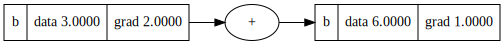

In [ ]:
a = Value(3.0, label='b')
b = a + a; b.label = 'b'
b.backward()
draw_dot(b, label)

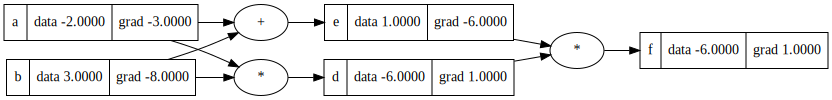

In [ ]:
a = Value(-2.0, label='a')
b = Value(3.0, label='b')
d = a*b; d.label = 'd'
e = a+b; e.label = 'e'
f = d*e; f.label = 'f'
f.backward()
draw_dot(f, label)

### Add and multiply `Value` object with constant

In [ ]:
class Value:
    def __init__(self, data, _children=(), _op='', label=''):
        self.data = data
        self.grad = 0.0 # ⭠ Add grad
        self._backward = lambda : None
        self._prev = set(_children)
        self._op = _op
        self.label = label

    def __repr__(self):
        return f"Value(label={self.label} data={self.data})"

    def __add__(self, other):
        other = other if isinstance(other, Value) else Value(other)
        out = Value(self.data + other.data, (self, other), '+')
        def _backward():
            self.grad += 1.0 * out.grad # <- Accumulate the gradient
            other.grad += 1.0 * out.grad # <- Accumulate the gradient
        out._backward = _backward
        return out
    
    def __radd__(self, other): # other + self
        return self + other
        
    def __mul__(self, other):
        other = other if isinstance(other, Value) else Value(other)
        out = Value(self.data * other.data, (self, other), '*')
        def _backward():
            self.grad += other.data * out.grad # <- Accumulate the gradient
            other.grad += self.data * out.grad # <- Accumulate the gradient
        out._backward = _backward
        return out
    
    def __rmul__(self, other): # other * self
        return self * other
    
    def tanh(self):
        x = self.data
        t = (math.exp(2*x) - 1)/(math.exp(2*x) + 1)
        out = Value(t, (self,), 'tanh')
        
        def _backward():
            self.grad += (1 - t**2) * out.grad # <- Accumulate the gradient
        out._backward = _backward
        return out

    def backward(self):
        topo = []
        visited = set()
        def build_topo(v):
            if v not in visited:
                visited.add(v)
                for child in v._prev:
                    build_topo(child)
                topo.append(v)
        build_topo(self)
        
        self.grad = 1.0
        for node in reversed(topo):
            node._backward() 

In [ ]:
a = Value(2.0); a + 1

Value(label= data=3.0)

In [ ]:
a = Value(2.0); a * 1

Value(label= data=2.0)

In [ ]:
2 * a

Value(label= data=4.0)

In [ ]:
2 + a

Value(label= data=4.0)

### Implement `tanh`

In [ ]:
class Value:
    def __init__(self, data, _children=(), _op='', label=''):
        self.data = data
        self.grad = 0.0 # ⭠ Add grad
        self._backward = lambda : None
        self._prev = set(_children)
        self._op = _op
        self.label = label

    def __repr__(self):
        return f"Value(label={self.label} data={self.data})"

    def __add__(self, other):
        other = other if isinstance(other, Value) else Value(other)
        out = Value(self.data + other.data, (self, other), '+')
        def _backward():
            self.grad += 1.0 * out.grad # <- Accumulate the gradient
            other.grad += 1.0 * out.grad # <- Accumulate the gradient
        out._backward = _backward
        return out
    
    def __radd__(self, other): # other + self
        return self + other
        
    def __mul__(self, other):
        other = other if isinstance(other, Value) else Value(other)
        out = Value(self.data * other.data, (self, other), '*')
        def _backward():
            self.grad += other.data * out.grad # <- Accumulate the gradient
            other.grad += self.data * out.grad # <- Accumulate the gradient
        out._backward = _backward
        return out
    
    def __rmul__(self, other): # other * self
        return self * other
    
    def __pow__(self, other):
        assert isinstance(other, (int, float)), "only supporting int/float powers for now"
        out = Value(self.data ** other, (self,), f'**{other}')
        
        def _backward():
            self.grad += other * (self.data ** (other - 1)) * out.grad
        out._backward = _backward
        
        return out
        
    
    def exp(self):
        x = self.data
        out = Value(math.exp(x), (self,), 'exp')
        
        def _backward():
            self.grad += out.data * out.grad
        out._backward = _backward
        return out
    
    def __truediv__(self, other): # self / other
        return self * other**-1
    
    def tanh(self):
        x = self.data
        t = (math.exp(2*x) - 1)/(math.exp(2*x) + 1)
        out = Value(t, (self,), 'tanh')
        
        def _backward():
            self.grad += (1 - t**2) * out.grad # <- Accumulate the gradient
        out._backward = _backward
        return out

    def __neg__(self): #-self
        return -self
    
    def __sub__(self, other): # self - other
        return self + (-other)
        
    def backward(self):
        topo = []
        visited = set()
        def build_topo(v):
            if v not in visited:
                visited.add(v)
                for child in v._prev:
                    build_topo(child)
                topo.append(v)
        build_topo(self)
        
        self.grad = 1.0
        for node in reversed(topo):
            node._backward() 

In [ ]:
a = Value(2.0)

In [ ]:
a.exp()

Value(label= data=7.38905609893065)

In [ ]:
b = Value(3.0)

In [ ]:
a/b

Value(label= data=0.6666666666666666)

In [ ]:
a **4

Value(label= data=16.0)

In [ ]:
a - 1

Value(label= data=1.0)

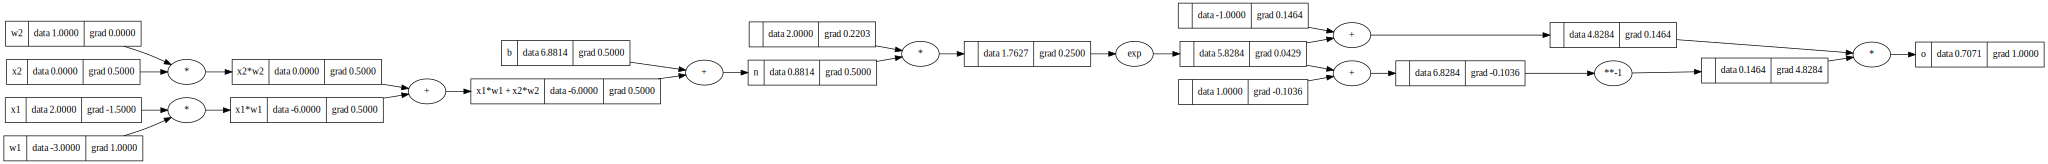

In [ ]:
x1 = Value(2.0, label='x1')
x2 = Value(0.0, label='x2')

w1 = Value(-3.0, label='w1')
w2 = Value(1.0, label='w2')

b = Value(6.8813735870195432, label='b')

x1w1 = x1*w1; x1w1.label='x1*w1'
x2w2 = x2*w2; x2w2.label='x2*w2'
x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label='x1*w1 + x2*w2'
n = x1w1x2w2 + b; n.label='n'
# -----
e = (2*n).exp()
o = (e - 1)/(e + 1)
# -----
o.label = 'o'
o.backward()
draw_dot(o, label)

## `x1w1 + x2w2 + b` with PyTorch

In [ ]:
import torch

In [ ]:
x1 = torch.Tensor([2.0]).double(); x1.requires_grad = True
x2 = torch.Tensor([0.0]).double(); x2.requires_grad = True
w1 = torch.Tensor([-3.0]).double(); w1.requires_grad = True
w2 = torch.Tensor([1.0]).double(); w2.requires_grad = True
b = torch.Tensor([6.8813735870195432]); b.requires_grad = True
n = x1*w1 + x2*w2 + b
o = torch.tanh(n)

print(o.data.item())
o.backward()

print('-----')
print('x2', x2.grad.item())
print('w2', w2.grad.item())
print('x1', x1.grad.item())
print('w1', w1.grad.item())


0.7071066904050358

-----

x2 0.5000001283844369

w2 0.0

x1 -1.5000003851533106

w1 1.0000002567688737

In [ ]:
torch.Tensor([[1, 2, 3], [4, 5, 6]])

tensor([[1., 2., 3.],
        [4., 5., 6.]])

## Neural Network

In [ ]:
import random

In [ ]:
class Neuron:
    def __init__(self, nin):
        self.w = [Value(random.uniform(-1, 1)) for _ in range(nin)]
        self.b = Value(random.uniform(-1, 1))
    
    def __call__(self, x):
        act =  sum((wi*xi for wi, xi in zip(self.w, x)), self.b)
        return act.tanh()

    def parameters(self):
        return self.w + [self.b]
    
x = [2.0, 3.0]
n = Neuron(2)
n(x) 

Value(label= data=-0.9898983203150599)

In [ ]:
class Layer:
    def __init__(self, nin, nout):
        self.neurons = [Neuron(nin
                              ) for _ in range(nout)]
    
    def __call__(self, x):
        outs = [n(x) for n in self.neurons]
        return outs[0] if len(outs) == 1 else outs
    
    def parameters(self):
        return [p for neuron in self.neurons for p in neuron.parameters()]

In [ ]:
x = [2.0, 3.0]
n = Layer(2, 3)
n(x)

[
    Value(label= data=-0.4016875052919579),
    Value(label= data=-0.6476941952536311),
    Value(label= data=-0.9394060677739323)
]

In [ ]:
class MLP:
    def __init__(self, nin, nouts):
        sz = [nin] + nouts
        self.layers = [Layer(sz[i], sz[i+1]) for i
                       in range(len(nouts))]
        
    def __call__(self, x):
        for layer in self.layers:
            x = layer(x)
        return x
    
    def parameters(self):
        return [p for layer in self.layers for p in layer.parameters()]

In [ ]:
x = [2.0, 3.0, -1.0]
n = MLP(3, [4, 4, 1])
o = n(x)
o.grad = 1
o.backward()

In [ ]:
n.parameters(), len(n.parameters())

(
    [
        Value(label= data=-0.08412499341645452),
        Value(label= data=-0.450849307174382),
        Value(label= data=-0.3827002060422857),
        Value(label= data=0.4382880112301186),
        Value(label= data=0.9418757720328914),
        Value(label= data=0.8049417462882635),
        Value(label= data=0.8506016585853975),
        Value(label= data=-0.18841124677723453),
        Value(label= data=0.0792253585980136),
        Value(label= data=-0.8873985189063482),
        Value(label= data=-0.4355416357415889),
        Value(label= data=0.860263363810883),
        Value(label= data=-0.39936396445310396),
        Value(label= data=-0.0731826741756969),
        Value(label= data=0.24416754090958182),
        Value(label= data=0.8160261355637699),
        Value(label= data=0.3888814031604182),
        Value(label= data=-0.09430652616356427),
        Value(label= data=-0.19979958998592706),
        Value(label= data=-0.7326554800814791),
        Value(label= data=0.028438503005491),
        Value(label= data=0.1712752422464654),
        Value(label= data=0.6142271695349875),
        Value(label= data=0.6809154485300228),
        Value(label= data=0.4516048323962163),
        Value(label= data=0.9164174663169802),
        Value(label= data=-0.6668122306826993),
        Value(label= data=0.7782311342544905),
        Value(label= data=0.467884806789868),
        Value(label= data=0.7125640016076482),
        Value(label= data=0.05865729813946219),
        Value(label= data=0.26560866486252266),
        Value(label= data=0.7463324225438563),
        Value(label= data=-0.6780142568967904),
        Value(label= data=0.8548378553645073),
        Value(label= data=-0.3618052252266013),
        Value(label= data=-0.5526814422764044),
        Value(label= data=-0.7651103894033027),
        Value(label= data=0.8568274533802358),
        Value(label= data=-0.7682215600164528),
        Value(label= data=-0.3389517072508228)
    ],
    41
)

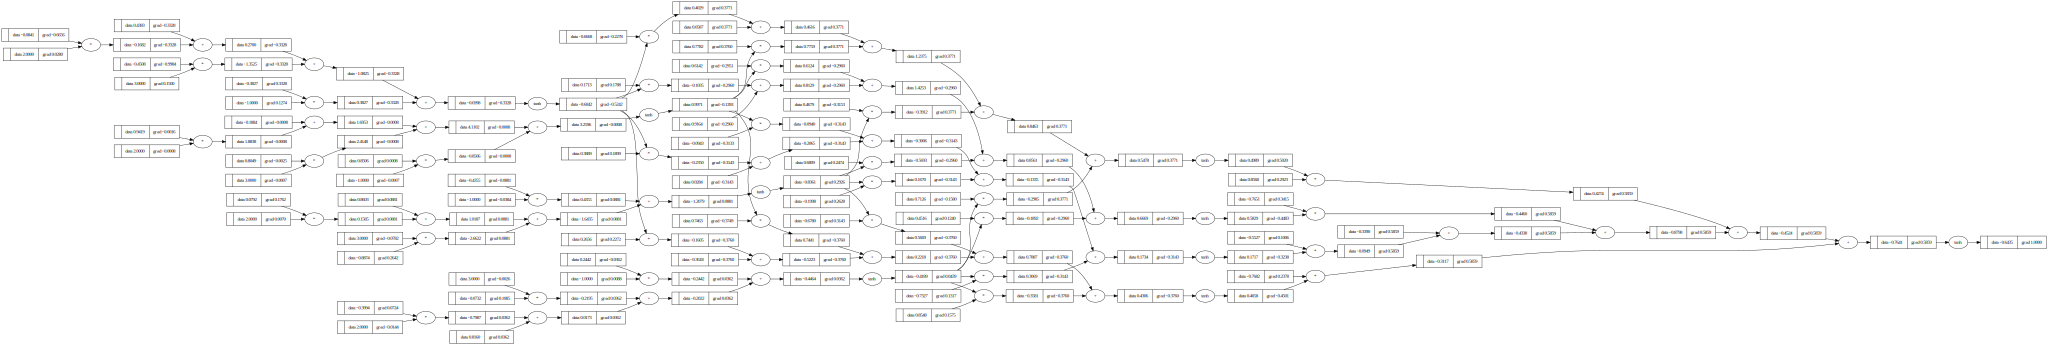

In [ ]:
draw_dot(o, label)

## Tiny Dataset with loss function

In [ ]:
xs = [
    [2.0, 3.0, -1.0],
    [3.0, -1.0, 0.5],
    [0.5, 1.0, 1.0], 
    [1.0, 1.0, -1.0]
]
ys = [1.0, -1.0, -1.0, 1.0]

In [ ]:
ypred = [n(x) for x in xs]
loss = sum([(yout - ygt)**2 for ygt, yout in zip(ys, ypred)])
loss

Value(label= data=5.5690240180582355)

In [ ]:
ypred

[
    Value(label= data=-0.6435004844286167),
    Value(label= data=-0.272612553503336),
    Value(label= data=-0.5207137716394364),
    Value(label= data=-0.45228178730028357)
]

### Repeat

In [ ]:
loss.backward()

In [ ]:
n.layers[0].neurons[0].w[0].grad

0.82659156202808

In [ ]:
n.layers[0].neurons[0].w[0].data

-0.08412499341645452

In [ ]:
for p in n.parameters():
    p.data += -0.01 * p.grad

In [ ]:
n.layers[0].neurons[0].w[0].data

-0.09239090903673532

In [ ]:
ypred = [n(x) for x in xs]
loss = sum([(yout - ygt)**2 for ygt, yout in zip(ys, ypred)])
loss

Value(label= data=4.821243471365067)

In [ ]:
ypred

[
    Value(label= data=-0.5043057415432777),
    Value(label= data=-0.2351547993877803),
    Value(label= data=-0.47088437238898684),
    Value(label= data=-0.30129019785874583)
]

In [ ]:
n.parameters()

[
    Value(label= data=-0.09239090903673532),
    Value(label= data=-0.49691753788932447),
    Value(label= data=-0.351323597963901),
    Value(label= data=0.4230937107057171),
    Value(label= data=0.9403748464237981),
    Value(label= data=0.8031213866060041),
    Value(label= data=0.8524700001571043),
    Value(label= data=-0.19002789962672578),
    Value(label= data=0.09450690282626045),
    Value(label= data=-0.866345568649188),
    Value(label= data=-0.4550790459625688),
    Value(label= data=0.87502415191454),
    Value(label= data=-0.3993698678318843),
    Value(label= data=-0.0668709003814209),
    Value(label= data=0.2393458526073428),
    Value(label= data=0.8178282004733795),
    Value(label= data=0.39169704421187257),
    Value(label= data=-0.09936297020022597),
    Value(label= data=-0.19358968044880567),
    Value(label= data=-0.7305117109174485),
    Value(label= data=0.01867623617682604),
    Value(label= data=0.17454077181678349),
    Value(label= data=0.6076402923581736),
    Value(label= data=0.6856587955507853),
    Value(label= data=0.45479940237051864),
    Value(label= data=0.9089867367736324),
    Value(label= data=-0.6701708965414787),
    Value(label= data=0.7879219461501005),
    Value(label= data=0.4617208561904713),
    Value(label= data=0.7105020847295658),
    Value(label= data=0.07351664563289637),
    Value(label= data=0.26897074366673),
    Value(label= data=0.7380578303196094),
    Value(label= data=-0.6707926527076677),
    Value(label= data=0.8562723051182568),
    Value(label= data=-0.3767347369827604),
    Value(label= data=-0.5490544320444323),
    Value(label= data=-0.7550897506449221),
    Value(label= data=0.8609569051573838),
    Value(label= data=-0.765448549419488),
    Value(label= data=-0.3229011298195802)
]

### Make the above `Repeat` section into `training` loop

In [ ]:
def train(repeats, model, xs, ygt, lr = 0.01):
    
    for k in range(repeats):
        # forward pass
        ypred = [model(x) for x in xs]
        loss = sum((yout - ygt)**2 for ygt, yout in zip(ygt, ypred))
        print(k, loss.data)
        
        # backward propagation
        for p in n.parameters(): p.grad = 0.0 # zero_grad()
        loss.backward()
        
        # update: gradient descent
        for p in model.parameters(): p.data += -lr * p.grad
    return ypred

In [ ]:
xs = [
    [2.0, 3.0, -1.0],
    [3.0, -1.0, 0.5],
    [0.5, 1.0, 1.0], 
    [1.0, 1.0, -1.0]
]
ys = [1.0, -1.0, -1.0, 1.0]

In [ ]:
model = MLP(3, [4, 4, 1])

In [ ]:
train(10, model, xs, ys, 0.05)

0 7.786879082913552

1 7.319199050999472

2 6.018787390914104

3 4.119900721386288

4 2.8805500680968397

5 3.1891523413420355

6 2.4500338550659437

7 0.7287143325898044

8 1.1771852730045138

9 0.4211953918206025

[
    Value(label= data=0.5457411710285535),
    Value(label= data=-0.9494048195513953),
    Value(label= data=-0.9480406639920966),
    Value(label= data=0.5421958243538144)
]

Done!